In [97]:
# Decision Tree
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import numpy as np

In [42]:
pd.set_option('display.max_columns', None)

In [43]:
# SQL setup
from sqlalchemy import create_engine
# connect to a local database
engine = create_engine("sqlite:///boxscores.db")

In [44]:
# load in data
df_2020=pd.read_sql('2020',engine)
df_2021=pd.read_sql('2021',engine)
df_2022=pd.read_sql('2022',engine)

In [45]:
# concatenate them together
all_years=[df_2020,df_2021,df_2022]
df=pd.concat(all_years)

Features: 
['OPS', 'RBI', 'BA_RISP', 'ERA', 'BB_p', 'E']

Train Acc Score= 0.96355517142034
Train Precision Score= 0.956447963800905
Train Recall Score= 0.9715598965814422
[[3307  154]
 [  99 3382]]

Test Acc Score= 0.9546240276577356
Test Precision Score= 0.94275802254987
Test Recall Score= 0.9653641207815276
[[1122   66]
 [  39 1087]]

Feature Importances:
[0.0062233  0.44140322 0.00445469 0.5357771  0.00082958 0.0113121 ]

New York Yankees
Stats:
[0.73174522 4.78343949 0.2337849  3.3577707  2.7388535  0.45859873]

Winner


/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quot

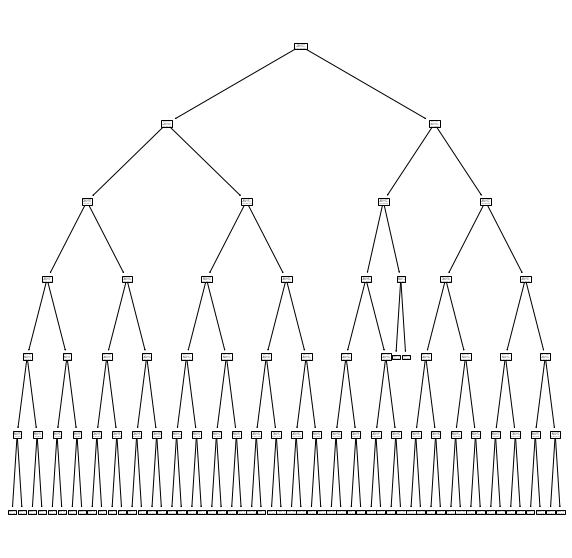

In [116]:
# Select new group of features
# model 17
X=df[['OPS','RBI','BA_RISP','ERA','BB_p','E']]
y=df['Won']

print('Features: ')
print(X.columns.tolist())
print('')

# train test val split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

decisiontree = DecisionTreeClassifier(max_depth=6,random_state=42)

decisiontree.fit(X_train, y_train)

y_pred_test=decisiontree.predict(X_test)
y_pred_train=decisiontree.predict(X_train)


train_acc_score=decisiontree.score(X_train, y_train)
train_prec_score=precision_score(y_train,y_pred_train)
train_recall_score=recall_score(y_train,y_pred_train)
confusion_matrix_train=confusion_matrix(y_train, y_pred_train)

test_acc_score=decisiontree.score(X_test, y_test)
test_prec_score=precision_score(y_test,y_pred_test)
test_recall_score=recall_score(y_test,y_pred_test)
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)


print('Train Acc Score= '+str(train_acc_score))
print('Train Precision Score= '+str(train_prec_score))
print('Train Recall Score= '+str(train_recall_score))
print(confusion_matrix_train)
print('')
print('Test Acc Score= '+str(test_acc_score))
print('Test Precision Score= '+str(test_prec_score))
print('Test Recall Score= '+str(test_recall_score))
print(confusion_matrix_test)
print('')

print('Feature Importances:')
print(decisiontree.feature_importances_)
print('')

# make prediction by team and year average stats
team='New York Yankees'
print(team)
df_team=pd.concat(all_years)
df_team=df_team[df_team.Team==team]
df_team=df_team[df_team.Date>'2021-12-31']
stat_list=[]
for i in X.columns:
    stat_list.append(df_team['%s' % i].mean())
stat_list=np.array(stat_list)

print('Stats:')
print(stat_list)
print('')

y_pred=decisiontree.predict(stat_list.reshape(1,-1))
if y_pred[0]==1:
    print('Winner')
else:
    print('Loser')
    
plt.figure(figsize=(10,10))
tree.plot_tree(decisiontree)
plt.savefig('out.pdf')

In [167]:
# Random Forest
# Select new group of features
# model 17
X=df[['OPS','RBI','BA_RISP','ERA','BB_p','E']]
y=df['Won']

print('Features: ')
print(X.columns.tolist())
print('')

# train test val split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

randomforest = RandomForestClassifier(max_depth=13,random_state=42,) #13 .9628

randomforest.fit(X_train, y_train)

y_pred_test=randomforest.predict(X_test)
y_pred_train=randomforest.predict(X_train)


train_acc_score=randomforest.score(X_train, y_train)
train_prec_score=precision_score(y_train,y_pred_train)
train_recall_score=recall_score(y_train,y_pred_train)
confusion_matrix_train=confusion_matrix(y_train, y_pred_train)

test_acc_score=randomforest.score(X_test, y_test)
test_prec_score=precision_score(y_test,y_pred_test)
test_recall_score=recall_score(y_test,y_pred_test)
confusion_matrix_test=confusion_matrix(y_test,y_pred_test)


print('Train Acc Score= '+str(train_acc_score))
print('Train Precision Score= '+str(train_prec_score))
print('Train Recall Score= '+str(train_recall_score))
print(confusion_matrix_train)
print('')
print('Test Acc Score= '+str(test_acc_score))
print('Test Precision Score= '+str(test_prec_score))
print('Test Recall Score= '+str(test_recall_score))
print(confusion_matrix_test)
print('')

print('Feature Importances:')
print(randomforest.feature_importances_)
print('')

# make prediction by team and year average stats
team='Los Angeles Dodgers'
print(team)
df_team=pd.concat(all_years)
df_team=df_team[df_team.Team==team]
df_team=df_team[df_team.Date>'2021-12-31']
stat_list=[]
for i in X.columns:
    stat_list.append(df_team['%s' % i].mean())
stat_list=np.array(stat_list)

print('Stats:')
print(stat_list)
print('')

y_pred=randomforest.predict(stat_list.reshape(1,-1))
if y_pred[0]==1:
    print('Winner')
else:
    print('Loser')
    
#plt.figure(figsize=(10,10))
#tree.plot_tree(randomforest)
#plt.savefig('out.pdf')

Features: 
['OPS', 'RBI', 'BA_RISP', 'ERA', 'BB_p', 'E']



/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(


Train Acc Score= 0.9992797464707577
Train Precision Score= 0.9991384261918438
Train Recall Score= 0.9994254524561907
[[3458    3]
 [   2 3479]]

Test Acc Score= 0.9628349178910977
Test Precision Score= 0.9626334519572953
Test Recall Score= 0.9609236234458259
[[1146   42]
 [  44 1082]]

Feature Importances:
[0.15399794 0.25599746 0.07194696 0.46125591 0.03257228 0.02422945]

Los Angeles Dodgers
Stats:
[0.76613291 5.07594937 0.26040639 2.81702532 2.53797468 0.51265823]

Winner


/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quot

In [169]:
# model 17 validation

y_pred_val=randomforest.predict(X_val)

val_acc_score=randomforest.score(X_val,y_val)
val_prec_score=precision_score(y_val,y_pred_val)
val_recall_score=recall_score(y_val,y_pred_val)
confusion_matrix_val=confusion_matrix(y_val,y_pred_val)
    
    

print('Val Acc Score= '+str(val_acc_score))
print('Val Precision Score= '+str(val_prec_score))
print('Val Recall Score= '+str(val_recall_score))
print(confusion_matrix_val)

print('')

Val Acc Score= 0.9684528954191876
Val Precision Score= 0.9662447257383966
Val Recall Score= 0.9719864176570459
[[1096   40]
 [  33 1145]]



/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
/Users/colingallagher/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['quoted_name']. An error will be raised in 1.2.
  warnings.warn(
